# Problem Statement

# Linear Regression Employee Salary Prediction

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### PART - 1 DATA EXPLORATION AND PRE-PROCESSING

### 1 - Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Vyas\1_Assignment\ML FT Projects\Linear Regression\Employee Salary Analysis\Python_Linear_Regres.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
print(f'Number of Rows are {df.shape[0]} and Number of Columns are {df.shape[1]}')

Number of Rows are 8 and Number of Columns are 4


### Finding the null values

In [4]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

### 2 - Filling null values in experience columns with zero using numpy

In [5]:
df['experience'] = df['experience'].replace(np.nan,0)
df.isnull().sum()

experience                    0
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

### 3 - Replacing null values in Test score column with mean values

In [6]:
mean = int(df['test_score(out of 10)'].mean())
df['test_score(out of 10)'].fillna(value = mean, inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


### 4 - Scatter plot between Experience and Salary

Replacing string in experience as numbers so that we can see it in scatter plot

In [7]:
df['experience'] = df['experience'].replace('five',5)
df['experience'] = df['experience'].replace('two',2)
df['experience'] = df['experience'].replace('seven',7)
df['experience'] = df['experience'].replace('three',3)
df['experience'] = df['experience'].replace('ten',10)
df['experience'] = df['experience'].replace('eleven',11)

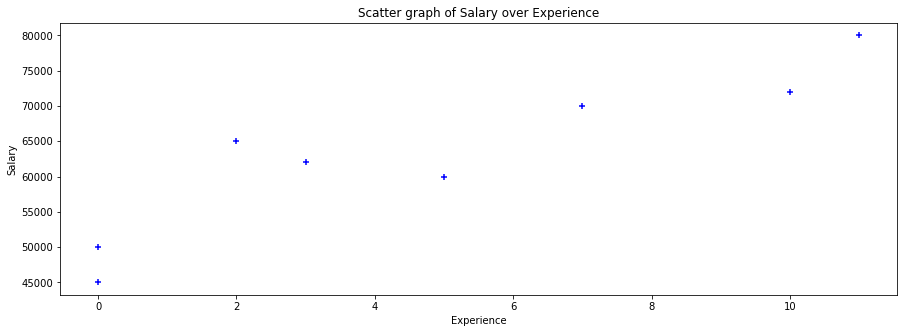

In [8]:
plt.figure(figsize= (15,5))
x = df['experience']
y = df['salary($)']
plt.scatter(x , y, c = 'b', marker = '+')
plt.title("Scatter graph of Salary over Experience")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

We can observe as the experience increases the salary tends to increase as well

### 5 - Scatter plot between test score vs salary

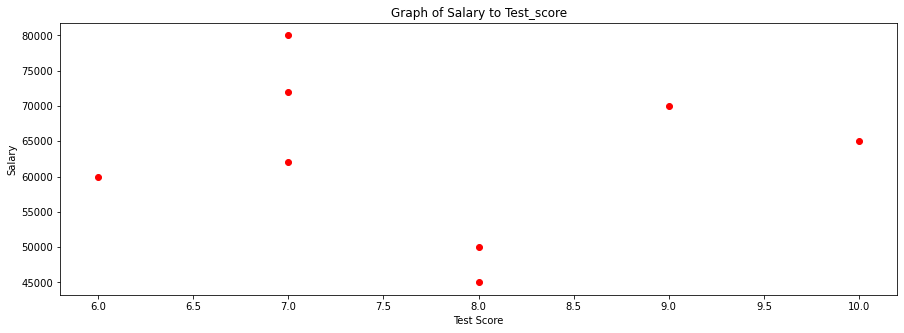

In [9]:
plt.figure(figsize=(15,5))
plt.title("Graph of Salary to Test_score")
y = df['salary($)']
x = df['test_score(out of 10)']
plt.xlabel("Test Score")
plt.ylabel("Salary")
plt.scatter(x,y,c='r')
plt.show()

Higher test score doesnot necessarily mean higher salary it depends on other factors as well

### 6 - Scatter plot Interview score vs Salary

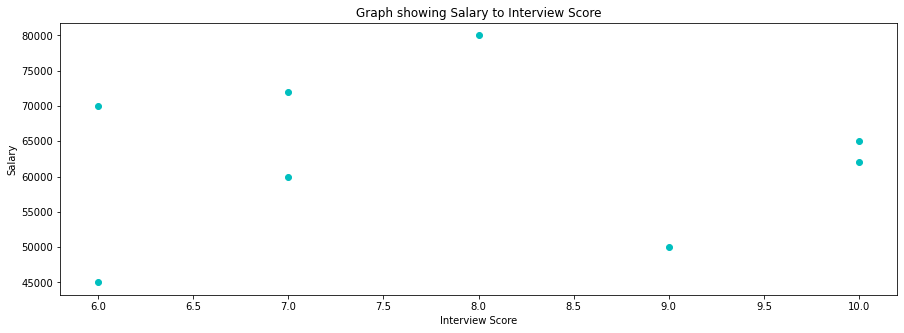

In [10]:
plt.figure(figsize = (15,5))
plt.title("Graph showing Salary to Interview Score")
plt.xlabel("Interview Score")
plt.ylabel("Salary")
x = df['interview_score(out of 10)']
y = df['salary($)']
plt.scatter(x,y,c='c')
plt.show()

Again we can see that good inteview score need not mean higher salary

### 7 - Bar plot for experience

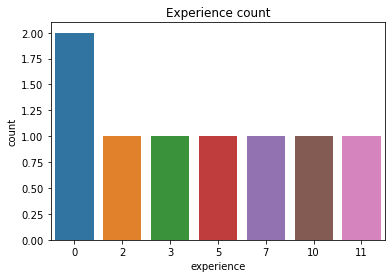

In [11]:
sns.countplot(x='experience', data=df);
plt.title("Experience count")
plt.show()

# Part-2 Working with Model

#### 1 - Seperating feature data from target data

Target is the experience as it seems there is some relation that we can use to prodict but here we will still use all three columns to predict salary

In [12]:
other = df.drop('salary($)', axis=1)
salary = df[['salary($)']]

#### 2 - Making regression model

In [13]:
model = LinearRegression()

In [14]:
model.fit(other,salary)

LinearRegression()

In [15]:
predicted = model.predict(other)
predicted

array([[52090.46734071],
       [45648.01964161],
       [57964.2290839 ],
       [64525.1061363 ],
       [68325.21184635],
       [60783.44785255],
       [74796.8832586 ],
       [79866.63483999]])

#### 3 - By displaying test, training score as well as experience, we try to predict the salary

In [16]:
predict1 = model.predict([[4,4,6]])
predict1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[48451.85930334]])

In [17]:
predict2 = model.predict([[1,10,10]])
predict2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[61602.83712128]])

#### 4 - Extracting Slope and Intercept value from the model

In [18]:
print("Slope value for the model is: ", model.coef_)
print("Intercept value for the model is: ", model.intercept_)

Slope value for the model is:  [[2922.26901502 2221.30909959 2147.48256637]]
Intercept value for the model is:  [14992.65144669]


In [19]:
# Checking the value for predict1 i.e 4,4,6
# y = m1*1+m2*2+m3*3+b
2922.26901502*4 + 2221.30909959*4 + 2147.48256637*6 + 14992.65144669

48451.85930334999

#### 5 - Display Mean Squared Error

In [20]:
from sklearn.metrics import mean_squared_error as mse
MSE = mse(salary,predicted)
print("Mean Squared Error for the model is: ", MSE)

Mean Squared Error for the model is:  2660640.9097884092


#### 6 - Display Mean Absolute Error

In [21]:
from sklearn.metrics import mean_absolute_error as mae
MAE = mae(salary,predicted)
print("Mean Absolute Error for the model is: ", MAE)

Mean Absolute Error for the model is:  1383.8425602291509


#### 7 - Display Root Mean Squared Error

In [22]:
import math
RMSE = math.sqrt(MSE)
print("Root Mean Squared Error for the model is: ", RMSE)

Root Mean Squared Error for the model is:  1631.1471146982449


#### 8 - Display the R2 value

In [23]:
r2 = r2_score(salary,predicted)
print("R2 value for the model is: ", r2)

R2 value for the model is:  0.9770139014273139


### Model has around 97% accuracy